<a href="https://colab.research.google.com/github/imran201khan/MachineLearning/blob/main/Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [222]:
#read csv file
df=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')
df.shape

(6410, 5)

**Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.**

In [223]:
#duplicates values
df.duplicated().sum()

14

In [224]:
df.head()

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [225]:
#rename columns
columns=['Ambient_Temperature','Ambient_Pressure','Relative_Humidity','Exhaust_Vacuum','PE']

In [226]:
df.columns=columns

In [227]:
df.head()

,Ambient_Temperature,Ambient_Pressure,Relative_Humidity,Exhaust_Vacuum,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [228]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [229]:
#check null
df.isnull().sum()

Ambient_Temperature    0
Ambient_Pressure       0
Relative_Humidity      0
Exhaust_Vacuum         0
PE                     0
dtype: int64

Text(0.5, 1.0, 'Exhaust_Vacuum VS PE')

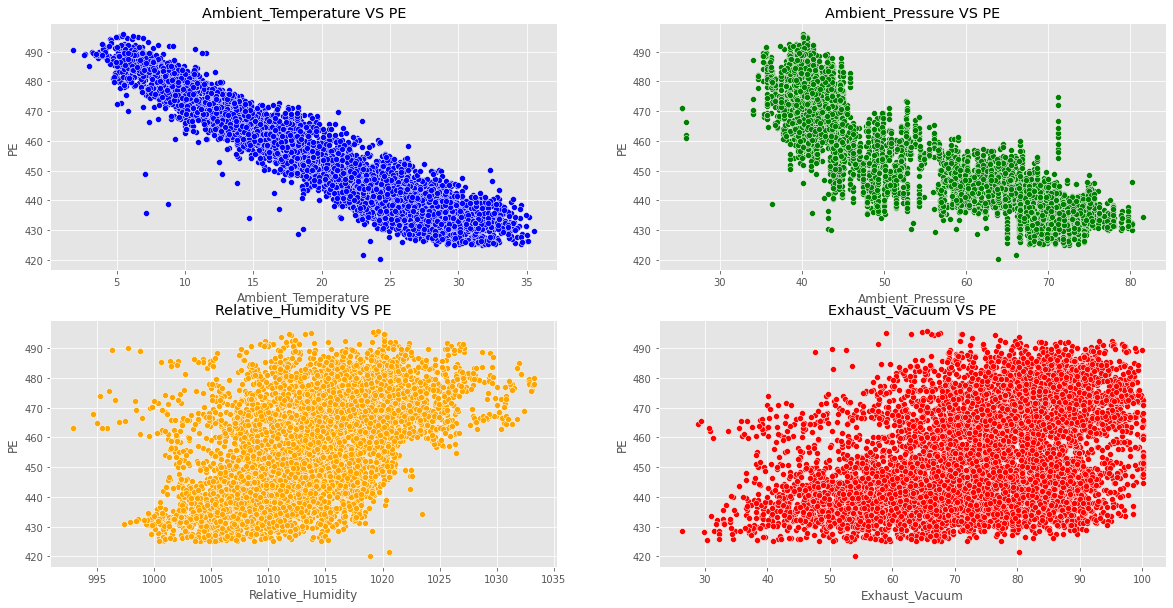

In [230]:
#plot scatter plot every input column with o/p column for check relationship
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(df['Ambient_Temperature'],df['PE'],color='blue')
plt.title("Ambient_Temperature VS PE")
plt.subplot(2,2,2)
sns.scatterplot(df['Ambient_Pressure'],df['PE'],color='green')
plt.title("Ambient_Pressure VS PE")
plt.subplot(2,2,3)
sns.scatterplot(df['Relative_Humidity'],df['PE'],color='orange')
plt.title("Relative_Humidity VS PE")
plt.subplot(2,2,4)
sns.scatterplot(df['Exhaust_Vacuum'],df['PE'],color='red')
plt.title("Exhaust_Vacuum VS PE")

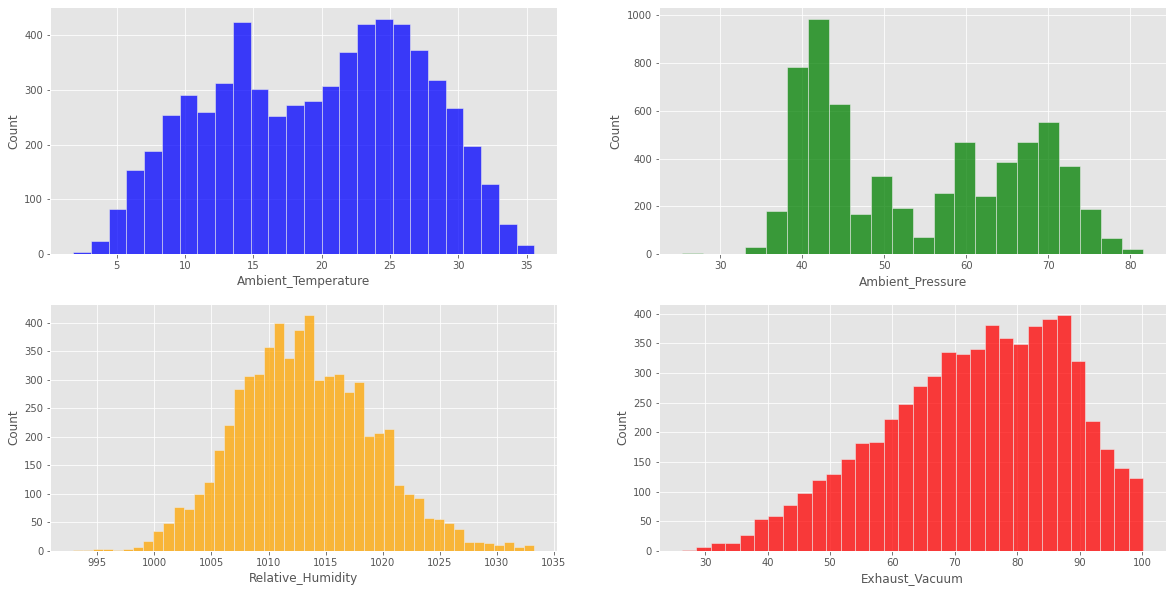

In [231]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(df['Ambient_Temperature'],color='blue')

plt.subplot(2,2,2)
sns.histplot(df['Ambient_Pressure'],color='green')

plt.subplot(2,2,3)
sns.histplot(df['Relative_Humidity'],color='orange')

plt.subplot(2,2,4)
sns.histplot(df['Exhaust_Vacuum'],color='red')

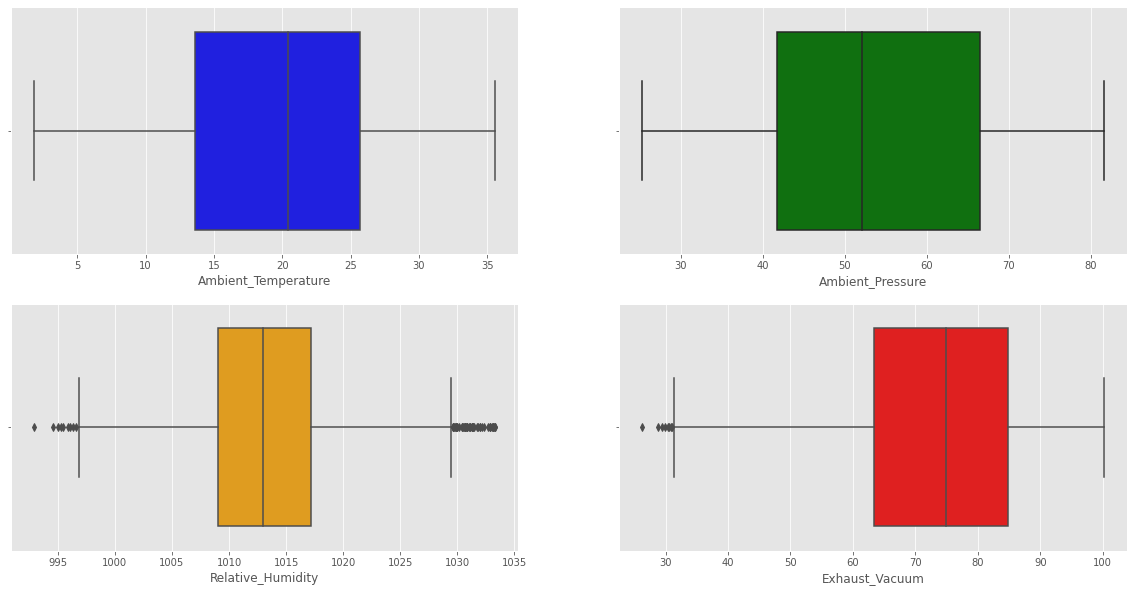

In [232]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['Ambient_Temperature'],color='blue')

plt.subplot(2,2,2)
sns.boxplot(df['Ambient_Pressure'],color='green')

plt.subplot(2,2,3)
sns.boxplot(df['Relative_Humidity'],color='orange')

plt.subplot(2,2,4)
sns.boxplot(df['Exhaust_Vacuum'],color='red')


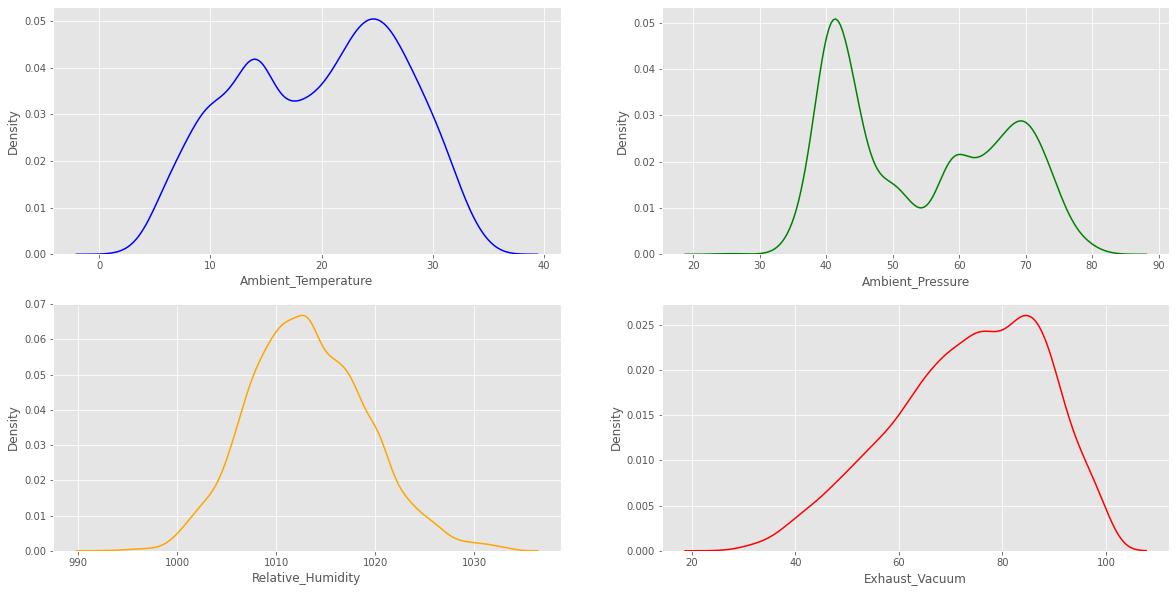

In [233]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(df['Ambient_Temperature'],color='blue',hist=False)

plt.subplot(2,2,2)
sns.distplot(df['Ambient_Pressure'],color='green',hist=False)

plt.subplot(2,2,3)
sns.distplot(df['Relative_Humidity'],color='orange',hist=False)

plt.subplot(2,2,4)
sns.distplot(df['Exhaust_Vacuum'],color='red',hist=False)

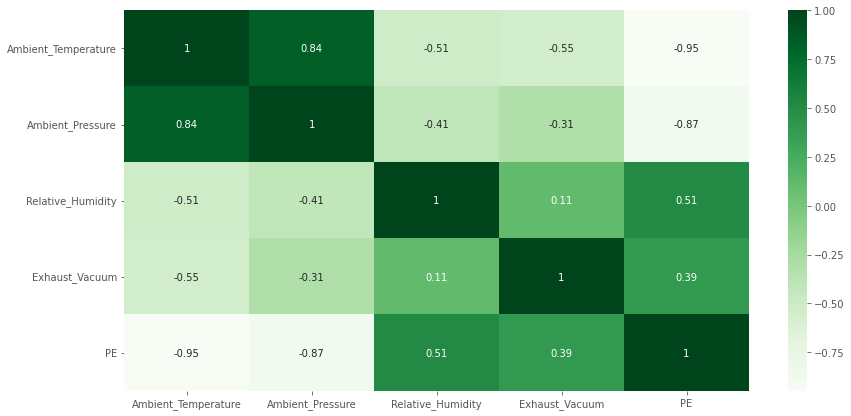

In [244]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [234]:
#predict without remove outlier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [235]:
#linear regression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
r2_score(y_pred,y_test)*100

93.12436424628639

In [236]:
#decision tree
DT=DecisionTreeRegressor(max_depth=50,min_samples_split=10,min_samples_leaf=4,random_state=2,max_leaf_nodes=300)
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
r2_score(y_pred,y_test)*100   

93.82725954256645

In [260]:
#random forest
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=1000,max_depth=30,min_samples_split=3, n_jobs=-1,random_state=0,min_samples_leaf=2,max_features=4,oob_score=False)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
r2_score(y_pred,y_test)*100   

95.7646025728109

In [257]:
RF.base_estimator_
#The child estimator template used to create the collection of fitted sub-estimators

DecisionTreeRegressor()

In [258]:
RF.n_features_in_
#Number of features seen during fit.

4

In [253]:
RF.feature_names_in_
#Names of features seen during fit. Defined only when X has feature names that are all string

array(['Ambient_Temperature', 'Ambient_Pressure', 'Relative_Humidity',
       'Exhaust_Vacuum'], dtype=object)

In [255]:
RF.n_outputs_
#The number of outputs when fit is performed.

1

In [238]:
#xgboost version
import xgboost as xg
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)*100   

[21:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


96.49738529218358

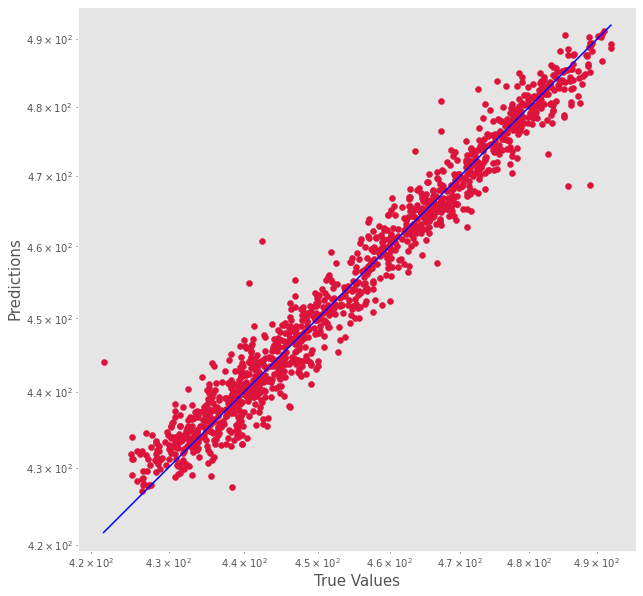

In [239]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [241]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
4970,484.50,488.185547
6369,436.33,441.290161
4873,456.81,458.392975
4027,449.03,441.049713
132,446.05,443.761261
...,...,...
4091,457.01,461.415527
1728,446.44,444.683990
748,455.34,452.055328
1664,472.82,470.182190
